<a href="https://colab.research.google.com/github/Emjeeey/ITBA-3205_HumanTraffickingINDIA/blob/main/404_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Emjeeey/ITBA-3205_HumanTraffickingINDIA.git


In [ ]:
!pip install seaborn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#understanding the data

In [40]:
data = '/content/ITBA-3205_HumanTraffickingINDIA/Human Trafficking dataset/2019_victims_trafficked.xlsx'
VictimsTrafficked2019 = pd.read_excel(data)


In [ ]:
VictimsTrafficked2019.info()

In [ ]:
VictimsTrafficked2019.describe()

In [ ]:
VictimsTrafficked2019.head()

,State/UT,Male,Female,Total_victims_trafficked,Age Group,region type
0,Andhra Pradesh,0,18,18,Below 18,state
1,Arunachal Pradesh,1,3,4,Below 18,state
2,Assam,24,56,80,Below 18,state
3,Bihar,261,33,294,Below 18,state
4,Chhattisgarh,52,61,113,Below 18,state


In [ ]:
VictimsTrafficked2019.tail()

,State/UT,Male,Female,Total_victims_trafficked,Age Group,region type
67,D&N Haveli,0,0,0,Above 18,union territory
68,Daman & Diu,0,0,0,Above 18,union territory
69,Delhi UT,42,30,72,Above 18,union territory
70,Lakshadweep,0,0,0,Above 18,union territory
71,Puducherry,0,5,5,Above 18,union territory


In [ ]:
VictimsTrafficked2019.shape

In [ ]:
VictimsTrafficked2019.columns

In [ ]:
VictimsTrafficked2019.nunique()

In [ ]:
VictimsTrafficked2019.isnull().sum()

State/UT                    0
Male                        0
Female                      0
Total_victims_trafficked    0
Age Group                   0
region type                 0
dtype: int64

In [ ]:
#cleaning the data

In [ ]:
#assigning filters  for 0 values

In [ ]:
df= pd.DataFrame(VictimsTrafficked2019)

In [ ]:
filt1 = (df['Male'] == 0 ) & (df['Female'] == 0 ) & (df['Total_victims_trafficked'] == 0 )

In [ ]:
df.loc[filt1]

In [ ]:
df.drop((df.index[df['Male'] == 0]) & (df.index[df['Female'] == 0]) & (df.index[df['Total_victims_trafficked'] == 0])  , inplace=True)

In [ ]:
CleanVT = df.drop(['region type' ], axis=1)

In [ ]:
CleanVT.info()

In [ ]:
CleanVT.describe()

In [ ]:
CleanVT.mean()

In [ ]:
CleanVT

In [ ]:
#CleanVT is variable for the cleaned data for victims in 2019

In [ ]:
sns.set_style(style="darkgrid")

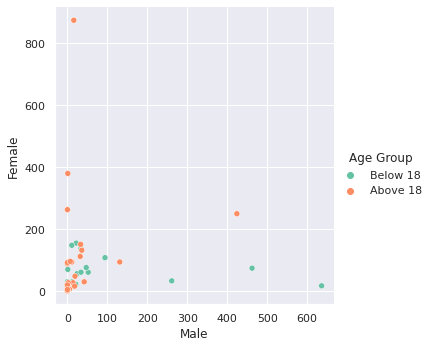

In [434]:
sns.set_style(style="darkgrid")
sns.relplot(x="Male", y="Female", hue="Age Group", data=CleanVT)

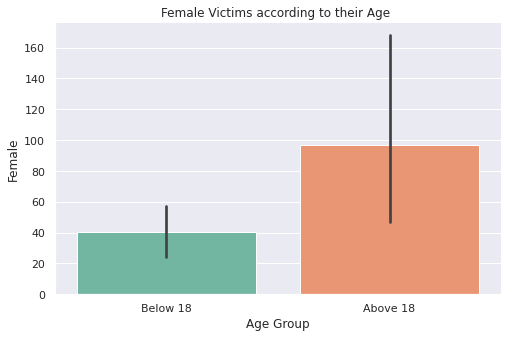

In [435]:
sns.set_style(style="darkgrid")
sns.set_palette('Set2')
sns.barplot(x='Age Group', y= 'Female', data= CleanVT)

plt.title("Female Victims according to their Age ")
sns.despine()

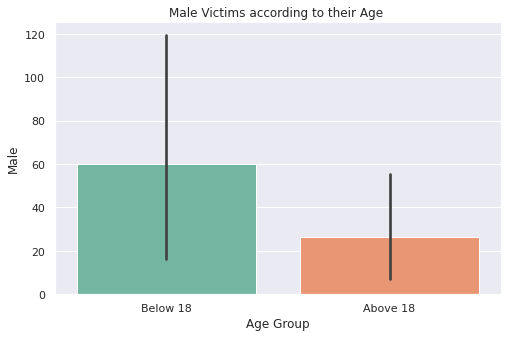

In [436]:
sns.set_style(style="darkgrid")
sns.barplot(x='Age Group', y= 'Male', data= CleanVT)

plt.title("Male Victims according to their Age ")
sns.despine()


In [ ]:
#dataset for Purpose of trafficking

In [7]:
df = pd.read_csv (r'/content/ITBA-3205_HumanTraffickingINDIA/Human Trafficking dataset/Purpose of Trafficking.csv')
print(df)

                  Purpose of Trafficking  Total person
0                         Forced Labour           1141
1  Sexual Exploitation for Prostitution           2080
2                    Domestic Servitude            364
3                       Forced Marriage            227
4                          Petty Crimes             13
5                               Begging             68
6                     Removal of Organs              4
7                         Other reasons           2674
8                                    NaN          6571


In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [9]:
dfRow=df.drop(7)
dfRow1=dfRow.drop(4)
dfRow2=dfRow1.drop(6)


In [ ]:
#cleaning the data and dropping the columns that have 0 values

In [10]:
df1 = dfRow2.dropna()
df1

,Purpose of Trafficking,Total person
0,Forced Labour,1141
1,Sexual Exploitation for Prostitution,2080
2,Domestic Servitude,364
3,Forced Marriage,227
5,Begging,68


In [ ]:
df1.info()

In [ ]:
df1.describe()

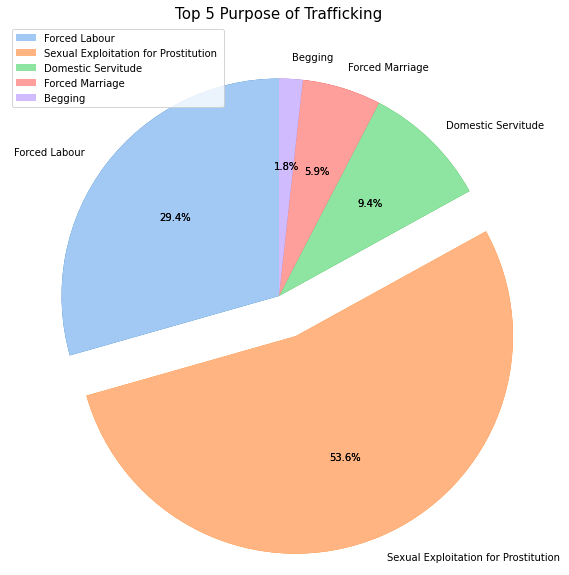

In [21]:
from IPython.core.pylabtools import figsize
data = df1['Total person']
labels = df1['Purpose of Trafficking']

colors = sns.color_palette('pastel')
fig, ax = plt.subplots(figsize=(19,8))
explode = (0,0.2,0,0,0)
ax.pie(data, explode=explode, labels=labels,autopct='%1.1f%%',
        frame=True, startangle=90,radius= 1)
patches, texts, auto = ax.pie(data, colors=colors,  startangle=90,explode=explode, autopct='%1.1f%%' )
 

plt.legend(patches, labels, loc="best",fontsize=10)
fig= plt.gcf()
fig.set_size_inches(10,10)
plt.title("Top 5 Purpose of Trafficking",fontsize= 15)


plt.show()



In [ ]:
sns.set_style(style="darkgrid")

In [ ]:
df3 = pd.read_csv (r'/content/ITBA-3205_HumanTraffickingINDIA/Human Trafficking dataset/Male_and_female_victims_of_trafficking_for_sexual_exploitation_over_time.csv')
print(df3)

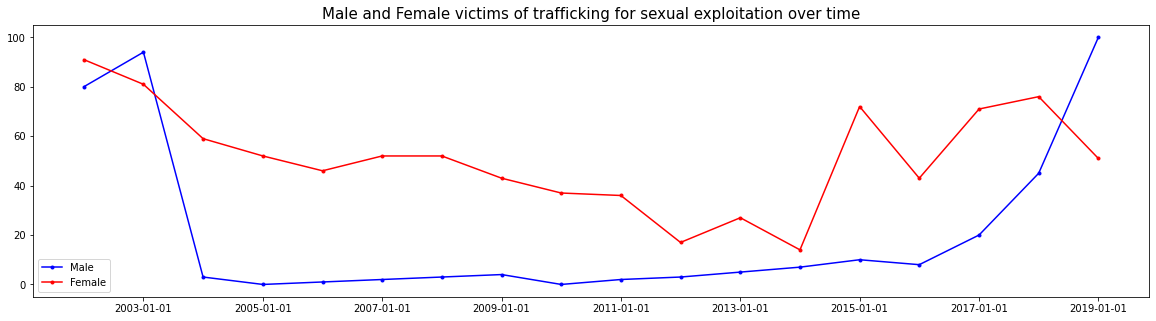

In [31]:
df3['yearofregistration']=pd.to_datetime(df3['yearofregistration'], format='%Y')
df3.yearofregistration=pd.to_datetime(df3.yearofregistration,format='%Y')
plt.figure(figsize=(20,5))
plt.title('Male and Female victims of trafficking for sexual exploitation over time',fontsize= 15)
plt.plot(df3.yearofregistration, df3.Male,'b.-',label='Male')
plt.plot(df3.yearofregistration, df3.Female,'r.-',label= 'Female')
#print(df3.yearofregistration[1::2])
plt.xticks(df3.yearofregistration[1::2])
plt.legend()

In [32]:
df4 = pd.read_csv (r'/content/ITBA-3205_HumanTraffickingINDIA/Human Trafficking dataset/Male_and_female_victims_of_trafficking_for_labour_exploitation_who_are_children.csv')
print(df4)

    yearofregistration  Female  Male
0                 2002      10   100
1                 2003      27     0
2                 2004      33    80
3                 2005      67    99
4                 2006      54   100
5                 2007      51    82
6                 2008      39    93
7                 2009      57    61
8                 2010      59    65
9                 2011      37    54
10                2012      92    96
11                2013      44    61
12                2014      57    73
13                2015       8    46
14                2016       9    49
15                2017      10    52
16                2018      11    24
17                2019      29     0


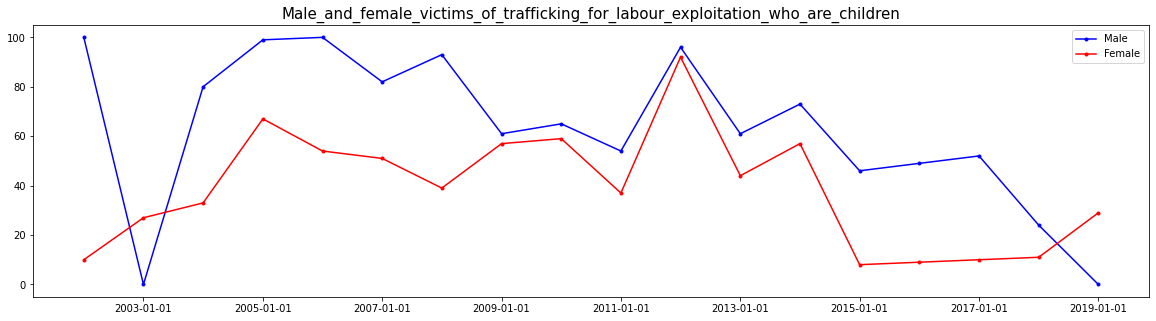

In [34]:
df4['yearofregistration']=pd.to_datetime(df4['yearofregistration'], format='%Y')
df4.yearofregistration=pd.to_datetime(df4.yearofregistration,format='%Y')
plt.figure(figsize=(20,5))
plt.title('Male_and_female_victims_of_trafficking_for_labour_exploitation_who_are_children',fontsize=15)
plt.plot(df4.yearofregistration, df4.Male,'b.-',label='Male')
plt.plot(df4.yearofregistration, df4.Female,'r.-',label= 'Female')
#print(df4.yearofregistration[1::2])
plt.xticks(df4.yearofregistration[1::2])
plt.legend()

In [36]:
df5 = pd.read_csv (r'/content/ITBA-3205_HumanTraffickingINDIA/Human Trafficking dataset/Means of control used on female victims.csv')
print(df5)


              Means of control  Female
0                 Debt bondage      18
1               Takes earnings      30
2   Restricts financial access       2
3                      Threats      38
4          Psychological abuse      44
5               Physical abuse      35
6                 Sexual abuse      19
7               False promises      31
8      Psychoactive substances      17
9           Restricts movement      44
10      Restricts medical care      13
11     Excessive working hours      22
12               Uses children       2
13   Threat of law enforcement       9
14       Withholds necessities      16
15         Withholds documents      23
16                 Other means      18


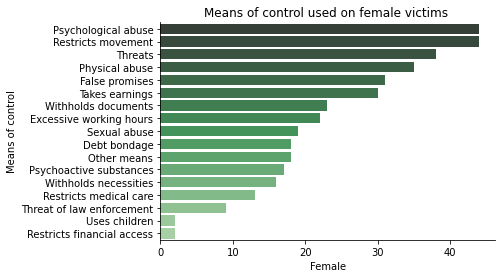

In [37]:
df5 = df5.sort_values(['Female'], ascending=False).reset_index(drop=True)
pal = sns.color_palette("Greens_d", len(df5))

sns.barplot(x='Female', y= 'Means of control', data= df5,palette=np.array(pal[::-1]))

plt.title("Means of control used on female victims ")
sns.despine()

In [ ]:
df6 = pd.read_csv (r'/content/ITBA-3205_HumanTraffickingINDIA/Human Trafficking dataset/Means of control used on male victims.csv')
print(df6)


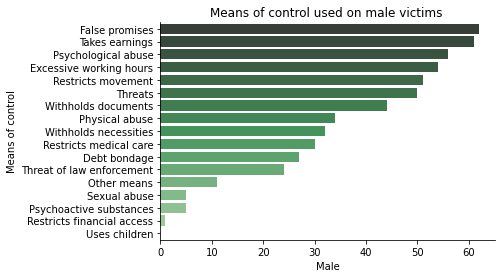

In [39]:
df6= df6.sort_values(['Male'], ascending=False).reset_index(drop=True)
pal = sns.color_palette("Greens_d", len(df5))
sns.barplot(x='Male', y= 'Means of control', data= df6,palette=np.array(pal[::-1]))

plt.title("Means of control used on male victims ")
sns.despine()